In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv
%matplotlib inline


## Discription of the Data set 
### The ECG dataset we used for this study has 109446 rows of data spread across 180 columns. The categorization process has employed five classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]. The class N stands for Normal, S for Supra-ventricular premature, V for Ventricular escape, F for Fusion of ventricular and noraml and Q for Unclassifiable. The sample frequency used to get ECG data is 125Hz, and it was obtained from Physionet's MIT-BIH Arrhythmia Dataset. The file is in CSV format.

### The Testing dataset is stored in test_data and the testing dataset has a size of 21892 x 188.

In [2]:
test_data = pd.read_csv('mitbih_test.csv',header = None)

In [3]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


### The Training Dataset is stored in train_data  and the training dataset has a size of 87554 x 188 

In [15]:
train_data = pd.read_csv('mitbih_train.csv',header = None)

In [16]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


### To begin, we count the values in the last column for the complete training set and display a bar graph to gain a clear understanding of the data in different classes.

In [17]:
train_target = train_data[187].value_counts() 

In [18]:
train_target

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

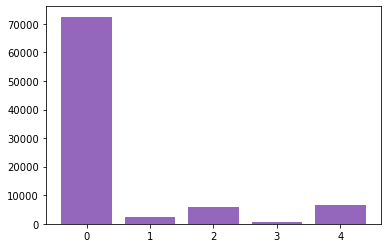

In [19]:
plt.bar(train_target.index,train_target.values, color = sb.color_palette()[4]);

In [27]:
np.random.seed(2018)
sample = np.random.choice(train_data.shape[0], 200, replace = False)
subset = train_data.loc[sample]

In [28]:
sample

array([64457, 36271, 27479, 26599, 13752, 54977, 14787, 30574, 34053,
       44015, 82499, 81399, 43202, 51049, 60833, 57080, 59285, 58768,
       82131,  1684, 85092, 72204, 44216, 84392,  4090, 29267, 80415,
       70591, 56703, 46970, 63212, 30533, 16412, 51179, 49917, 85284,
       85924, 73708, 52796, 30094,  4216, 42424, 73153, 36394, 16652,
       38694, 22594,  5785, 20781, 62178, 21557, 82027,  2776, 48132,
       33143,  9376, 85711, 64811, 13418, 11899, 44247, 84625, 54228,
        9424, 75838, 49703, 26874, 21143, 18671, 45923,  6769, 31748,
       70649, 72656, 67580, 53820, 37109, 37932, 63066, 56164, 63375,
       42215,  9867, 34625, 75272, 86968, 21040, 48282, 27564, 41823,
       31110,  8699, 73586, 32822, 75325, 83624, 28628, 46288, 12480,
       35384, 11615, 23261, 60026, 56212, 33542, 59177, 12071,  6614,
       25563, 40655, 55269, 49686, 46411, 24329, 85462, 20472,  8315,
       85247, 35365, 48807, 81424, 18239, 79101, 63292, 17571, 27445,
       56655, 70348,

In [29]:
subset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
64457,0.962963,0.811966,0.279202,0.025641,0.074074,0.085470,0.022792,0.005698,0.025641,0.022792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
36271,0.979487,0.561538,0.353846,0.233333,0.135897,0.074359,0.033333,0.023077,0.017949,0.017949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27479,0.960000,0.792000,0.468000,0.060000,0.000000,0.152000,0.196000,0.236000,0.256000,0.268000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
26599,0.988920,0.858726,0.412742,0.000000,0.199446,0.304709,0.373961,0.409972,0.423823,0.385042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
13752,1.000000,0.624060,0.067669,0.112782,0.187970,0.142857,0.131579,0.090226,0.056391,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77146,0.412451,0.396887,0.289235,0.130999,0.154345,0.178988,0.097276,0.035019,0.020752,0.000000,...,0.884565,0.684825,0.503243,0.343709,0.300908,0.313878,0.338521,0.352789,0.351492,2.0
26244,0.969091,0.863636,0.627273,0.356364,0.121818,0.034545,0.040000,0.061818,0.080000,0.089091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12805,1.000000,0.976190,0.608844,0.000000,0.017007,0.085034,0.112245,0.098639,0.125850,0.115646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
37083,1.000000,0.779070,0.209302,0.050388,0.065891,0.093023,0.077519,0.124031,0.174419,0.131783,...,0.217054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### We do the same evaluation as previously after selecting a random sample from the training dataset, calculating the frequency of each class and presenting the ratio of occurrences of each class in comparison to the entire random dataset.

In [30]:
percentages = [count / subset.shape[0] * 100 for count in subset[187].value_counts()]
percentages

[79.5, 10.5, 5.5, 4.0, 0.5]

In [31]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(train_target.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 79.5 %
the precent of 4 is : 10.5 %
the precent of 2 is : 5.5 %
the precent of 1 is : 4.0 %
the precent of 3 is : 0.5 %


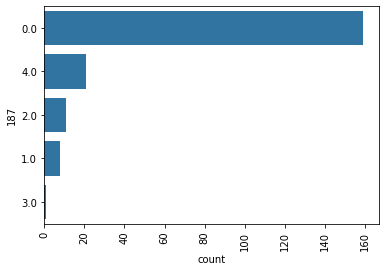

In [32]:
base_color = sb.color_palette()[0]
type_orderion = subset[187].value_counts().index
sb.countplot(data = subset, y = 187, color = base_color, order = type_orderion );
plt.xticks(rotation = 90);

### Re-sampling the train dataset to comparable counts and sizes yields the samples. Resampling is a technique for measuring the uncertainty of a population parameter precisely and cheaply using a data sample. It also helps to improve accuracy and eliminate bias towards a particular class.

In [33]:
from sklearn.utils import resample
target1=train_data[train_data[187]==1]
target2=train_data[train_data[187]==2]
target3=train_data[train_data[187]==3]
target4=train_data[train_data[187]==4]
target0=(train_data[train_data[187]==0]).sample(n=20000,random_state=42)

target1_sample=resample(target1,replace=True,n_samples=20000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=20000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=20000,random_state=0)
target4_sample=resample(target4,replace=True,n_samples=20000,random_state=0)

train_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])

In [34]:
train_target = train_data[187].value_counts()

In [35]:
train_target

0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64

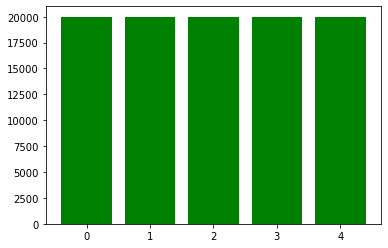

In [36]:
plt.bar(train_target.index,train_target.values, color = 'green');

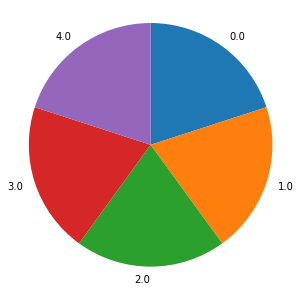

In [37]:
sorted_counts = train_data[187].value_counts();
plt.figure(figsize = [12,5.01])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

# Test Data
### The preceding steps are performed with the test data set.

In [38]:
test_target = test_data[187].value_counts()

In [39]:
test_target

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

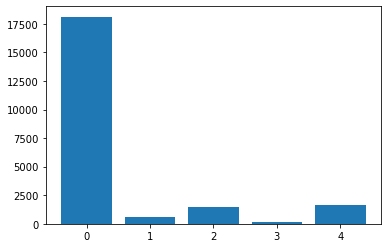

In [40]:
plt.bar(test_target.index,test_target.values, color = sb.color_palette()[0]);

In [41]:
np.random.seed(2020)
sample2 = np.random.choice(test_data.shape[0], 200, replace = False)
subset2 = test_data.loc[sample2]

In [42]:
percentages = [count / subset2.shape[0] * 100 for count in subset2[187].value_counts()]
percentages[0]

80.5

In [43]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(test_data.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 80.5 %
the precent of 1 is : 9.5 %
the precent of 2 is : 8.0 %
the precent of 3 is : 2.0 %


In [44]:
from sklearn.utils import resample
target1=test_data[test_data[187]==1]
target2=test_data[test_data[187]==2]
target3=test_data[test_data[187]==3]
target4=test_data[test_data[187]==4]
target0=(test_data[test_data[187]==0]).sample(n=2000,random_state=0)

target1_sample=resample(target1,replace=True,n_samples=2000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=2000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=2000,random_state=0)
target4_sample=resample(target4,replace=True,n_samples=2000,random_state=0)

test_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])

In [45]:
test_target = test_data[187].value_counts()

In [46]:
test_target

0.0    2000
1.0    2000
2.0    2000
3.0    2000
4.0    2000
Name: 187, dtype: int64

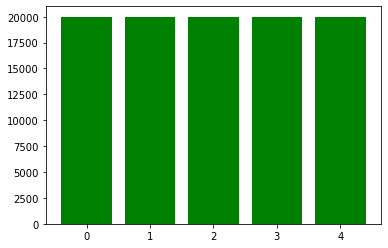

In [47]:
plt.bar(train_target.index,train_target.values, color = 'green');

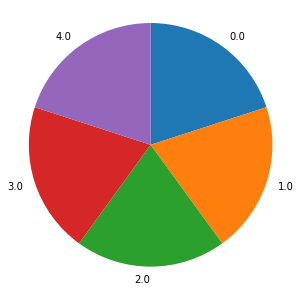

In [48]:
sorted_counts = train_data[187].value_counts();
plt.figure(figsize = [12,5.01])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

# Noise Visualisation and Detection

In [77]:
from scipy import stats

## P-value
### When the null hypothesis is believed to be true, the P-value tells us how probable we are to achieve a certain outcome. If we assume that the null hypothesis is true, the p-value estimates how "weird" our sample is. If the p-value is very little (usually, 0.05), our sample is "weird," which suggests that our assumption that the null hypothesis is valid is most likely wrong. As a result, we reject it.¶

## Pearson Coefficient
### The Pearson coefficient is a mathematical coefficient that represents the connection between two variables.Pearson coefficients vary from +1 to -1, with +1 indicating a positive association, -1 indicating a negative relationship, and 0 indicating no relationship.

In [82]:
pearson_coef, p_value = stats.pearsonr(train_data[1], train_data[187])

In [ ]:
test_data = pd.read_csv('mitbih_test.csv',header = None)

In [83]:
l = [('1', 1),('2',2),('3',3)]

In [84]:
if max(l):
    print(l)

[('1', 1), ('2', 2), ('3', 3)]


In [85]:
max(l)

('3', 3)

In [86]:
effictive_list = []
for i in train_data.columns:
    if i != 187:
        pearson_coef, p_value = stats.pearsonr(train_data[i], train_data[187])
        effictive_list.append((f'column number : {i}', f'Pearson Correlation {pearson_coef}', f'P-value : {p_value}'))
    else: break

In [87]:
print('*' * 75)
print(max(effictive_list))
print('*' * 75)

***************************************************************************
('column number : 99', 'Pearson Correlation 0.29915973057730316', 'P-value : 0.0')
***************************************************************************


Text(0, 0.5, 'time in seconds')

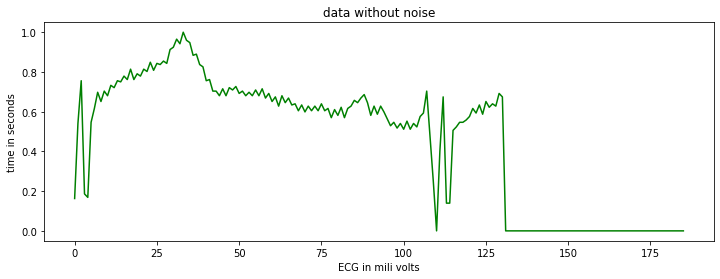

In [57]:
def add_guassian_noise(signal):
    noise = np.random.normal(0,0.05,186)
    return(signal + noise)
noise_data = add_guassian_noise(train_data.iloc[0,:186])
plt.figure(figsize = [12,4.02])
plt.plot(train_data.iloc[0,:186], color = 'green')
plt.title('data without noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')

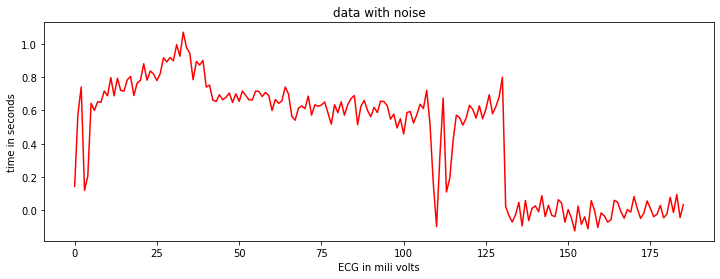

In [58]:
plt.figure(figsize = [12,4.02])
plt.plot(noise_data, color = 'red')
plt.title('data with noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')
plt.show()

In [59]:
len(train_data.columns)/60

3.1333333333333333

In [60]:
df = train_data.copy()

In [61]:
counter = 0
while counter <= len(df.columns):
    if counter != 186:
        df[counter] = df[counter] + df[counter + 1] + df[counter + 2] 
        counter += 3
    else: break

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,1.459302,0.540698,0.755814,0.901163,0.168605,0.546512,1.965116,0.697674,0.651163,2.116279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,2.273179,0.938742,0.344371,0.639073,0.273179,0.331126,1.014901,0.341060,0.347682,1.036424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,2.496487,0.932084,0.590164,0.313817,0.014052,0.168618,0.646370,0.210773,0.196721,0.627635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,2.228495,0.723118,0.526882,0.677419,0.220430,0.158602,0.263441,0.091398,0.080645,0.255376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,1.732984,0.709424,0.060209,0.112565,0.057592,0.041885,0.120419,0.034031,0.039267,0.138743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


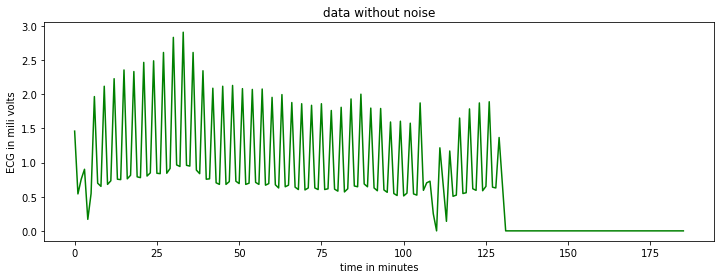

In [63]:
plt.figure(figsize = [12,4.02])
plt.plot(df.iloc[0,:186], color = 'green')
plt.title('data without noise');
plt.ylabel('ECG in mili volts');
plt.xlabel('time in minutes');

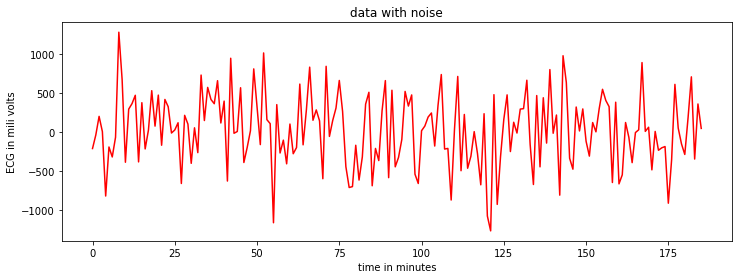

In [64]:
def add_guassian_noise2(signal):
    noise = np.random.normal(0,500,186)
    return(signal + noise)
plt.figure(figsize = [12,4.02])
plt.plot(add_guassian_noise2(df.iloc[0,:186]), color = 'red')
plt.title('data with noise')
plt.ylabel('ECG in mili volts')
plt.xlabel('time in minutes')
plt.show()

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,1.459302,0.540698,0.755814,0.901163,0.168605,0.546512,1.965116,0.697674,0.651163,2.116279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,2.273179,0.938742,0.344371,0.639073,0.273179,0.331126,1.014901,0.341060,0.347682,1.036424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,2.496487,0.932084,0.590164,0.313817,0.014052,0.168618,0.646370,0.210773,0.196721,0.627635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,2.228495,0.723118,0.526882,0.677419,0.220430,0.158602,0.263441,0.091398,0.080645,0.255376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,1.732984,0.709424,0.060209,0.112565,0.057592,0.041885,0.120419,0.034031,0.039267,0.138743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Applying Fourier Transformation

In [67]:
x = train_data.iloc[0,:].values

In [68]:
from numpy.fft import fft, ifft

In [69]:
x = train_data.iloc[0,:]
X = fft(x)

/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


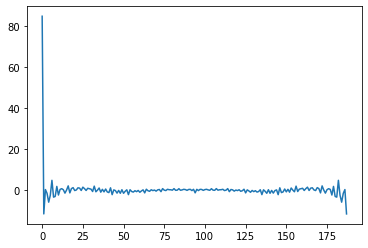

In [70]:
plt.plot(X)

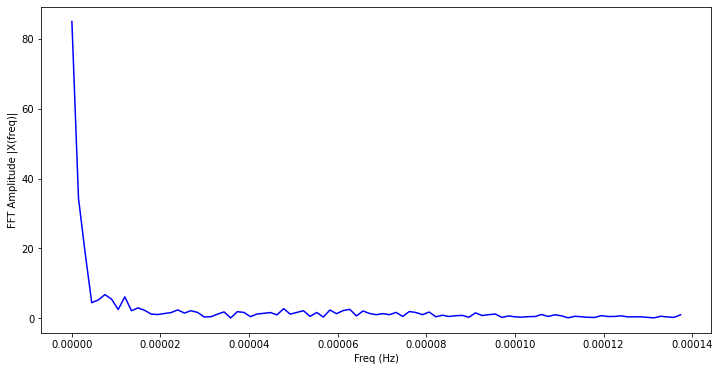

In [71]:
X = fft(train_data.iloc[0,:186])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [72]:
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

/var/folders/nw/syvl3ss12_x_dgvtrnf93s1c0000gn/T/ipykernel_16850/1891753606.py:1: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


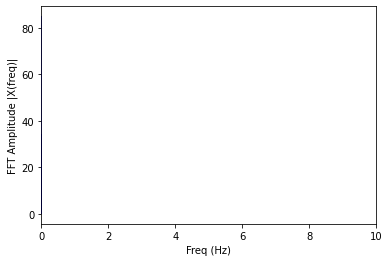

In [73]:
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10);

/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


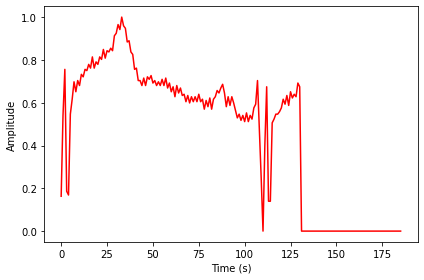

In [74]:
plt.plot(ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/var/folders/nw/syvl3ss12_x_dgvtrnf93s1c0000gn/T/ipykernel_16850/2023998756.py:1: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


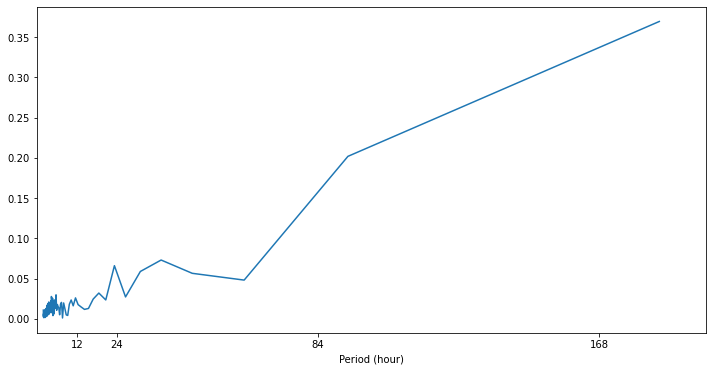

In [75]:
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period (hour)')
plt.show()

## Preprocessing step

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train = train_data.drop(187, axis=1)
y_train = train_data[187]

In [92]:
X_test = test_data.drop(187, axis=1)
y_test = test_data[187]

In [93]:
X_train = X_train.values
y_train = y_train.values

In [94]:
X_test = X_test.values
y_test = y_test.values

In [95]:
unique, counts = np.unique(y_train, return_counts=True)

pd.DataFrame(np.asarray((unique, counts)).T)

,0,1
0,0.0,20000.0
1,1.0,20000.0
2,2.0,20000.0
3,3.0,20000.0
4,4.0,20000.0


In [96]:
val = X_train[0][1]

In [97]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [98]:
norm = Normalizer()
std = StandardScaler()

In [101]:
val1 = norm.fit_transform([[val]])
val2 = std.fit_transform([[val]])

In [102]:
val1 

array([[1.]])

## Building the model

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [104]:
models = {
    "LR": LogisticRegression(solver='liblinear'),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()
}

In [105]:
type(X_train)

numpy.ndarray

In [106]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    
    
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    
    
    
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7779
Testing Accuracy: 0.7494
Testing Confusion Matrix: 
[[1250  239  266  190   55]
 [ 512 1293  115   58   22]
 [ 210   66 1388  243   93]
 [ 153    0  132 1715    0]
 [  52   12   77   11 1848]]
Recall Score :  0.7494
Precision Score :  0.7494
Testing F-1: 0.7494
Testing F-Beta: 0.7494
------------------------------
Training Model KNN 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 0.98929
Testing Accuracy: 0.8997
Testing Confusion Matrix: 
[[1868   71   39   16    6]
 [ 265 1642   73   11    9]
 [  24   30 1898   41    7]
 [ 131   15  226 1628    0]
 [  22    3   14    0 1961]]
Recall Score :  0.8997
Precision Score :  0.8997
Testing F-1: 0.8997
Testing F-Beta: 0.8996999999999999
------------------------------
Training Model DT 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 1.0
Testing Accuracy: 0.8326
Testing Confusion Matrix: 
[[1889   43   41   13   14]
 [ 508 1403   63    3   23]
 [ 184   12 1737   37   30]
 [ 305   10  265 1391   29]
 [  56    7   31    0 1906]]
Recall Score :  0.8326
Precision Score :  0.8326
Testing F-1: 0.8326
Testing F-Beta: 0.8326
------------------------------
Training Model RF 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 1.0
Testing Accuracy: 0.8748
Testing Confusion Matrix: 
[[1979   11    6    2    2]
 [ 532 1450    9    0    9]
 [  80    0 1890   21    9]
 [ 329    0  179 1492    0]
 [  56    1    6    0 1937]]
Recall Score :  0.8748
Precision Score :  0.8748
Testing F-1: 0.8748
Testing F-Beta: 0.8748
------------------------------
Training Model XGB 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 0.99968
Testing Accuracy: 0.9114
Testing Confusion Matrix: 
[[1960   25    9    4    2]
 [ 402 1564   20    2   12]
 [  69    7 1898   16   10]
 [ 129    0  148 1723    0]
 [  21    4    6    0 1969]]
Recall Score :  0.9114
Precision Score :  0.9114
Testing F-1: 0.9114
Testing F-Beta: 0.9114
------------------------------
Training Model Naive Bayes 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 0.45545
Testing Accuracy: 0.4574
Testing Confusion Matrix: 
[[ 213    9  143  289 1346]
 [ 148  301  115  190 1246]
 [ 166    9  358  125 1342]
 [   0    0   14 1718  268]
 [   1    0    6    9 1984]]
Recall Score :  0.4574
Precision Score :  0.4574
Testing F-1: 0.4574
Testing F-Beta: 0.4573999999999999
------------------------------
Training Model SVC 
--------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

Training Accuracy: 0.94759
Testing Accuracy: 0.907
Testing Confusion Matrix: 
[[1793   98   27   75    7]
 [ 302 1641   24   18   15]
 [  61   21 1828   84    6]
 [  63   15   78 1844    0]
 [  22    7    7    0 1964]]
Recall Score :  0.907
Precision Score :  0.907
Testing F-1: 0.907
Testing F-Beta: 0.907
------------------------------


/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/harshithm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (se

In [107]:
model = XGBClassifier()

In [108]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [109]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [110]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [111]:
# evaluating the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.14%


In [112]:
rounded_y = np.round(y_pred)

In [113]:
unique = pd.DataFrame(y_test)

In [114]:
unique[0].unique()

array([0., 1., 2., 3., 4.])

In [115]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[7379,  621],
        [  40, 1960]],

       [[7964,   36],
        [ 436, 1564]],

       [[7817,  183],
        [ 102, 1898]],

       [[7978,   22],
        [ 277, 1723]],

       [[7976,   24],
        [  31, 1969]]])

In [116]:
from niapy.algorithms.basic import ParticleSwarmAlgorithm
from niapy.task import Task

# we will run 10 repetitions of Weighted, velocity clamped PSO on the Pinter problem
for i in range(10):
    task = Task(problem='pinter', dimension=10, max_evals=2)
    algorithm = ParticleSwarmAlgorithm(population_size=100, w=0.9, c1=0.5, c2=0.3, min_velocity=-1, max_velocity=1)
    best_x, best_fit = algorithm.run(task)
    print(best_fit)

1847.6052100964098
2017.062371669584
2899.8825293083128
2665.8977997944558
2398.3377590976424
1377.5728089799554
3335.280378068287
2108.90974549274
2666.7277160288013
1412.941068539444
